# Chapter 3
## Feature Engineering

In [18]:
import  random
from math import sin, cos
import matplotlib.pyplot as plt
from time import perf_counter

In [2]:
import numpy as np

## Normalization
is numpy or even CuPy faster?  after researching, probably not.   Because you need min/max and that requires additional loops.  You'll see some benchmarks that a single loop (as implemented below) is fastest.

In [3]:
def normalize(ts):
    max_ts = max(ts)
    min_ts = min(ts)
    range = max_ts - min_ts
    normal_ts = [(v - min_ts)/range for v in ts]
    return normal_ts, max_ts, min_ts

In [4]:
def denormalize(ts, max_ts, min_ts):
    range = max_ts - min_ts
    denormal_ts = [v * (range) + min_ts for v in ts]
    return denormal_ts

In [5]:
# missing min & max
# which if you use numpy, requires 2 additional loops through the data
def np_normalize(ts):
    norm = np.linalg.norm(ts)
    normal_array = ts/norm
    return normal_array

### if __name__ == '__main__':

In [6]:
random.seed(1)

In [7]:
ts = [10 * sin(i) * cos(i) * cos(i) for i in range(20)]

In [8]:
normal_ts, max_ts, min_ts = normalize(ts)

In [9]:
denormal_ts = denormalize(normal_ts, max_ts, min_ts)

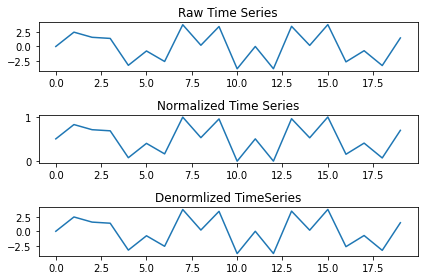

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.set_title("Raw Time Series")
ax1.plot(ts)

ax2.set_title("Normalized Time Series")
ax2.plot(normal_ts)

ax3.set_title("Denormlized TimeSeries")
ax3.plot(denormal_ts)
fig.tight_layout()
plt.show()

## Trend Removal

In [11]:
from sklearn.linear_model import LinearRegression

In [38]:
def detrend(ts):
    X = [[i] for i in range(len(ts))]
    y = np.array(ts).reshape(-1, 1)
    print (type(X), X[:5])
    print (y.shape)
    
    reg = LinearRegression().fit(X,y)    
    a = reg.coef_[0][0]
    b = reg.intercept_[0]
    print (a,b)
    detrend_ts = [(ts[i] - a * i - b) for i in range(len(ts))]
    return detrend_ts, a, b

In [39]:
def retrend(ts, a, b):
    return [(ts[i] + a * i + b) for i in range(len(ts))]

### if _name__ == '__main__':

In [40]:
random.seed(1)
ts = [10 + 0.8 * i + sin(i) + 3 * random.random() for i in range(20_000)]

In [41]:
start_detrend = perf_counter()
detrend_ts, a, b = detrend(ts)
print (f'detrend time: {perf_counter() - start_detrend}')

<class 'list'> [[0], [1], [2], [3], [4]]
(20000, 1)
0.800000541241196 11.49411241656344
detrend time: 0.04955942402011715


In [25]:
start_retrend = perf_counter()
retrend_ts = retrend(detrend_ts, a, b)
print (f'retrend time: {perf_counter() - start_retrend}')

retrend time: 0.020316748996265233


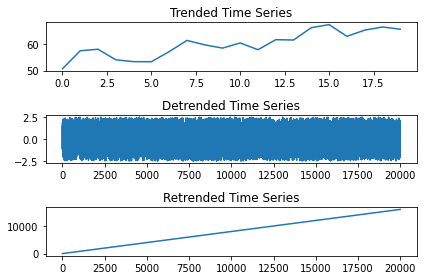

In [54]:
fig = plt.figure()

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.set_title("Trended Time Series")
ax1.plot(ts)

ax2.set_title("Detrended Time Series")
ax2.plot(detrend_ts)

ax3.set_title("Retrended Time Series")
ax3.plot(retrend_ts)

fig.tight_layout()
plt.show()

## Differencing

In [43]:
# similar to a derivative
# ? easy in this case because all values are evenly spaced
def differencing(ts):
    diff_ts = [(ts[i + 1] - ts[i]) for i in range(len(ts) - 1)]
    return diff_ts, ts[0]

In [49]:
def integration(ts, b):
    int_ts = [b]
    for i in range(len(ts)):
        int_ts.append(ts[i] + int_ts[i])
    return int_ts    

### if __name__ == '__main__'

In [50]:
random.seed(1)
ts = [50 + 0.8 * i + 3 * sin(i) + 5 * random.random() for i in range (20)]

In [51]:
diff_ts, b = differencing(ts)

In [52]:
int_ts = integration(diff_ts, b)

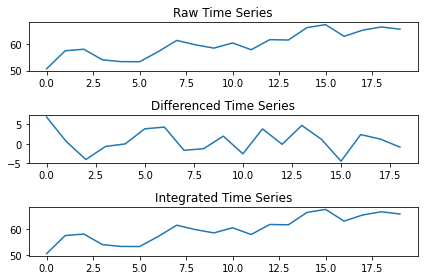

In [55]:
    fig = plt.figure()

    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)

    ax1.set_title("Raw Time Series")
    ax1.plot(ts)

    ax2.set_title("Differenced Time Series")
    ax2.plot(diff_ts)

    ax3.set_title("Integrated Time Series")
    ax3.plot(int_ts)

    fig.tight_layout()
    plt.show()

## Sliding Window

In [65]:
def sliding_window(ts, features):
    X = []
    Y = []
    
    for i in range(features + 1, len(ts) + 1):
        X.append(ts[i - (features + 1):i-1])
        Y.append([ts[i - 1]])
    return X, Y

### if __name__ == '__main__'

In [66]:
ts = list(range(6))
print (ts)
X, Y = sliding_window(ts, 3)

[0, 1, 2, 3, 4, 5]


In [69]:
print (f'Time series: {ts}')
print (f'X: {X}')
print (f'Y: {Y}')

Time series: [0, 1, 2, 3, 4, 5]
X: [[0, 1, 2], [1, 2, 3], [2, 3, 4]]
Y: [[3], [4], [5]]
